##### Credit Modelling

Aim of this project to focus on credit modelling that focuses on modeling a borrower's credit risk.Will be working with financial lending data from Lending Club.Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

This dataset contains loans data from 2007-2011 and i downloaded from [DataQuest](https://www.dataquest.io/)

In [1]:
import pandas as pd
import numpy as np
loans_2007 = pd.read_csv("loans_2007.csv")
loans_2007.drop_duplicates()
print(loans_2007.iloc[0]) 
print(loans_2007.shape[1])

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                                1077501
member_id                      1.2966e+06
loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

Features needs to remove that leaks data to avoid overfitting and also removing the column contains reduandant information.

- id
- member_id
- funded_amnt
- funded_amnt_inv
- grade
- sub_grade
- emp_title
- issue_d

In [2]:
cols=['id','member_id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d']
loans_2007.drop(cols, inplace=True, axis=1)


In [3]:
loans_2007.iloc[1]

loan_amnt                                2500
term                                60 months
int_rate                               15.27%
installment                             59.83
emp_length                           < 1 year
home_ownership                           RENT
annual_inc                              30000
verification_status           Source Verified
loan_status                       Charged Off
pymnt_plan                                  n
purpose                                   car
title                                    bike
zip_code                                309xx
addr_state                                 GA
dti                                         1
delinq_2yrs                                 0
earliest_cr_line                     Apr-1999
inq_last_6mths                              5
open_acc                                    3
pub_rec                                     0
revol_bal                                1687
revol_util                        

In [4]:
cols=['zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp']
loans_2007.drop(cols,axis=1, inplace=True)

drop the following columns that leaks data from the future(after the loan already started to be paid off)

In [5]:
cols3=['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','last_pymnt_d']
loans_2007=loans_2007.drop(cols3,axis=1)
print(loans_2007.iloc[1])
print(loans_2007.shape[1])

loan_amnt                                2500
term                                60 months
int_rate                               15.27%
installment                             59.83
emp_length                           < 1 year
home_ownership                           RENT
annual_inc                              30000
verification_status           Source Verified
loan_status                       Charged Off
pymnt_plan                                  n
purpose                                   car
title                                    bike
addr_state                                 GA
dti                                         1
delinq_2yrs                                 0
earliest_cr_line                     Apr-1999
inq_last_6mths                              5
open_acc                                    3
pub_rec                                     0
revol_bal                                1687
revol_util                               9.4%
total_acc                         

##### Target column

The target column that we want to use for modeling is "loan_status", since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower


In [6]:
print(loans_2007['loan_status'].value_counts())

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64


The target column has 33,136 loans that have been fully paid off, 5634 is charged off.The Fully Paid and Charged Off values describe the final outcome of the loan. In able to predict the loan_status, the "Fully Paid", "Charged off" which of these two category a loan will fall under. Need to remove other categories that don't contain either Fully Paid and Charged Off and need to transorm the Fully Paid values to 1 for the positive case and the Charged Off values to 0

#### Binary Classification

The loan status column consists of he following categorical data
- Fully Paid
- Charged Off
- Does not meet the credit policy. Status:Charged Off
- Does not meet the credit policy. Status:Fully Paid

since we are interstedin trying to predict which loans will be paid off on time and which ones won't be. Only the Fully Paid and Charged Off values describe the final outcome of the loan.

Going to tansform the Fully Paid values to 1 for the positive case and the Charged Off values to 0 for the negative case

In [7]:
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

In [8]:
#### Removing single value columns
orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


Removed 9 more columns since they only contained 1 unique value

In [9]:
loans = loans_2007
loans.head(3)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,credit_card,...,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Jun-2016,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,car,...,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2013,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,small_business,...,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Jun-2016,0.0


#### Feature Engineering
Continue exploring and preparing the features for modeling.

In [10]:
null_counts = loans.isnull().sum()
print(null_counts)

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1036
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [11]:
non_zero = null_counts!=0

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697


- emp_length | 1036
- title   | 11
- revol_util | 50
- last_credit_pull_d  | 2
- pub_rec_bankruptcies  | 697

emp_length and pub_rec_bankruptcies, contain a relatively high amount of missing values.emp_length is frequently used column for in assessing the borrower.And pub_rec_bankruptcies nearly 94% of values are in the same category

In [12]:
loans.drop("pub_rec_bankruptcies", axis=1,inplace=True)
loans = loans.dropna(axis=0)
print(loans.dtypes.value_counts())

object     11
float64    10
int64       1
dtype: int64


Numerical columns can be used with scikit-learn, the object columns that contain text need to be converted to numerical data types

#### Categorical Columns

In [13]:
object_columns_df = loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[1])

term                         60 months
int_rate                        15.27%
emp_length                    < 1 year
home_ownership                    RENT
verification_status    Source Verified
purpose                            car
title                             bike
addr_state                          GA
earliest_cr_line              Apr-1999
revol_util                        9.4%
last_credit_pull_d            Sep-2013
Name: 1, dtype: object


Some of the column below represents categorical values. By confirm by checking the number of unique values in those columns:

home_ownership: home ownership status, can only be 1 of 4 categorical values according to the data dictionary,

verification_status: indicates if income was verified by Lending Club,

emp_length: number of years the borrower was employed upon time of application,

term: number of payments on the loan, either 36 or 60,

addr_state: borrower's state of residence,

purpose: a category provided by the borrower for the loan request,

title: loan title provided by the borrower,

In [14]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']

for col in cols:
    print(loans[col].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
AL     420
LA     420
KY     311
OK     285
UT     249
KS     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      60
VT  

In [15]:
print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

Debt Consolidation                                               2068
Debt Consolidation Loan                                          1599
Personal Loan                                                     624
Consolidation                                                     488
debt consolidation                                                466
Credit Card Consolidation                                         345
Home Improvement                                                  336
Debt consolidation                                                314
Small Business Loan                                               298
Credit Card Loan                                                  294
Personal                                                          290
Consolidation Loan                                                250
Home Improvement Loan                                             228
personal loan                                                     219
Loan                

The below two columns would require a good amount of feature engineering for them to be potentially useful, let's remove these date columns from the Dataframe
- earliest_cr_line: The month the borrower's earliest reported credit line was opened,
- last_credit_pull_d: The most recent month Lending Club pulled credit for this loan.

we are going to use mapping to clean the column

In [16]:
pd.options.mode.chained_assignment = None
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
cols = ["last_credit_pull_d","addr_state", "title", "earliest_cr_line"]
loans.drop(cols, axis=1, inplace=True)
loans["int_rate"] =loans["int_rate"] .str.rstrip("%").astype("float")
loans["revol_util"] =loans["revol_util"] .str.rstrip("%").astype("float")

loans = loans.replace(mapping_dict)

We converted all of the columns to numerical values because those are the only type of value scikit-learn can work with

#### 8. Dummy variables
Going to encode the home_ownership, verification_status, purpose, and term columns as dummy variables 

In [17]:
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)

#### Picking an error metric
Error metric quantifies how well the machine learning model predictions match up against actual values.An error metric will help us determine if our algorithm will make us money or lose us money.

Main goal of this project to reduce the misclassification like with false positives and false negatives. With a false positive, we predict that a loan will be paid off on time, but it actually isn't. This costs us money, since we fund loans that lose us money. With a false negative, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off.

|loanstatus_actual|prediction|
|-----------------|----------|
|0                |1|
|1                |1|
|1                |1|

Above diagram we have predicted 85.7% correctly. Let's say we loan out 1000 dollars on average to each borrower. Each borrower pays us 10% interest back. So we make a projected profit of 100 dollars on each loan. In the above diagram, we'd actually lose money:

|loanstatus_actual|prediction|lossor profit|
|-----------------|----------|-------------|
|0                |1|-1000|
|1                |1|100|
|1                |1|100

we made 600 dollars in interest from the borrowers that paid us back, but we lost 1000 dollars on the one borrower who never paid us back, so we actually ended up losing 400 dollars overall,

Because of imbalanced classes in machine learning models,need to adjust your error metric accordingly. In this case, we don't want to use accuracy, and should instead use metrics that tell us the number of false positives and false negatives.

fpr = fp (False Positives) / (fp(False Positives) + tn(True Negatives))
tpr= tp(true positive) + (tp True Positives + fn(False Negatives))

going to compute false positives, true negatives, and false negatives.

In [18]:
def cal_error(prediction):
    
    prediction = pd.Series(prediction)
    # False positives
    fp_filter = (prediction == 1) & (loans['loan_status'] == 0)
    fp = len(prediction[fp_filter])
    
    # True positives
    tp_filter = (prediction == 1) & (loans['loan_status'] == 1)
    tp = len(prediction[tp_filter])
    
    # False negatives
    fn_filter = (prediction == 0) & (loans['loan_status'] == 1)
    fn = len(prediction[fn_filter])
    
    # True negatives
    tn_filter = (prediction == 0)& (loans['loan_status'] == 0)
    tn = len(prediction[tn_filter])
    
    # Rates
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    print(tpr * 100)
    print(fpr * 100)
    print()
    
    print('Other Mesurements:')
    
    
    specifity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    mean = np.sqrt(specifity * sensitivity)
    prcn = tp / (tp + fp)
    accur = (tn + tp) / features.shape[0]
    method_dict = {'specificity': '{:.2f}'.format(specifity*100), 
               'sensitivity': '{:.2f}'.format(sensitivity*100),
                'mean':'{:2f}'.format(mean*100),
               'precision': '{:.2f}'.format(prcn*100), 
               'accuracy': '{:.2f}'.format(accur*100),
               'False Positive Rate': '{:.2f}'.format(fpr*100)
              }
    return pd.DataFrame(method_dict,index=['values'])

####  Logistic Regression
A good first algorithm to apply to binary classification problems is logistic regression, for the following reasons:

- it's quick to train and we can iterate more quickly,
- it's less prone to overfitting than more complex models like decision trees

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model.sag import sag_solver
lr = LogisticRegression()
cols = loans.columns
train_cols=cols.drop("loan_status")
features= loans[train_cols]
target = loans['loan_status']
lr.fit(features, target)
predictions = lr.predict(features)

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.sag module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
cal_error(predictions)

99.84923964341898
99.8025666337611

Other Mesurements:


,specificity,sensitivity,mean,precision,accuracy,False Positive Rate
values,0.20,99.85,4.439997,85.77,80.89,99.80


Predictions were overfit.They were overfit because we generated predictions using the same data that we trained our model on In order to get a realistic depiction of the accuracy of the model need to perform k-fold cross validation.

cross_val_predict() function from the sklearn.model_selection

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold

lr = LogisticRegression()
predictions = cross_val_predict(lr,features,target,cv=3)
predictions = pd.Series(predictions)

#True positives
tp_filter = (predictions==1) & (loans['loan_status']==1)
tp = len(predictions[tp_filter])
#FalseNegative
fn_filter = (predictions==0)&(loans['loan_status']==1)
fn = len(predictions[fn_filter])
# False positives.
fp_filter = (predictions==1) & (loans['loan_status']==0)
fp= len(predictions[fp_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

#Rates
tpr= tp /(tp +fn)
fpr =fp /(fp +tn)
print(tpr)
print(fpr)

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

0.9980335605663345
0.9986179664363277


In [22]:
cal_error(predictions)

99.80335605663345
99.86179664363277

Other Mesurements:


,specificity,sensitivity,mean,precision,accuracy,False Positive Rate
values,0.14,99.80,3.713914,85.76,80.85,99.86


#### Cross Validation

Predictions were overfit because we predictions using the same data that we trained our model on.In order to get a realistic depiction of the accuracy of the model need to perform  k-fold cross validation by using the cross_val_predict() function from the sklearn.model_selection

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression()
predictions = cross_val_predict(lr,features,target,cv=3)

predictions = pd.Series(predictions)

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [24]:
cal_error(predictions)

99.80335605663345
99.86179664363277

Other Mesurements:


,specificity,sensitivity,mean,precision,accuracy,False Positive Rate
values,0.14,99.80,3.713914,85.76,80.85,99.86


Above the model achieves accuracy 80.85	which is misleading and it's able to predict just 0.05%(specificity) of the 0s from this why accuracy cannot be relied on in this problem. To get a classifier to correct for imbalanced classes need to tell the classifier to penalize the certain rows more.

By using class_weight parmameter to balanced when creating the LogisticRegression instance This tells scikit-learn to penalize the misclassification of the minority class during the training process. The penalty means that the logistic regression classifier pays more attention to correctly classifying rows where loan_status is 0. This lowers accuracy when loan_status is 1, but raises accuracy when loan_status is 0.

#### Manual penalties

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
penalty = {
    0: 13,
    1: 1
}

lr= LogisticRegression(class_weight = penalty)

predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [26]:
# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.0737742527530152
0.06811451135241856


In [27]:
cal_error(predictions)

7.377425275301521
6.811451135241856

Other Mesurements:


,specificity,sensitivity,mean,precision,accuracy,False Positive Rate
values,93.19,7.38,26.220060,86.71,18.50,6.81


Assigning manual penalties lowered the false positive rate to 6.8% and lowered our risk While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money

#### Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
predictions = cross_val_predict(rf, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.`
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.996722600943891
0.9982230997038499


Using a random forest classifier didn't improve our false positive rate. The model is likely weighting too heavily on the 1 class, and still mostly predicting 1s

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, categor

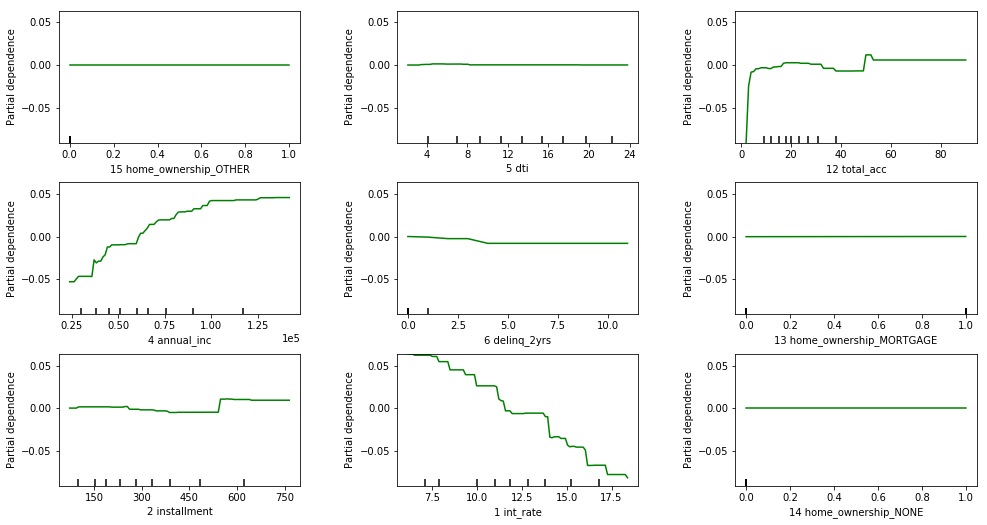

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,12)
feature_names = np.array([' '.join([str(b), a]) for a,b in
zip(features.columns,range(len(features.columns)))])

from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor(n_estimators=100,random_state=1).fit(features, target)
feature = [15,5,12,4,6,13,2,1,14]
fig, axis = plot_partial_dependence(GBM, features, feature,feature_names=feature_names)


#### tweaking the penalties further.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
penalty = {
    0: 13,
    1: 1
}

lr= LogisticRegression(class_weight = penalty)

predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [31]:
cal_error(predictions)# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.`
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

7.377425275301521
6.811451135241856

Other Mesurements:
0.0737742527530152
0.06811451135241856


Tweaking the penalties further lowered the false positive rate to 6.8%